In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Suppress TensorFlow informational messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"Training images shape: {train_images.shape}, Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape images to include channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

Training images shape: (60000, 28, 28), Training labels shape: (60000,)
Test images shape: (10000, 28, 28), Test labels shape: (10000,)


In [4]:
# Define the CNN model architecture
cnn_model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the model with optimizer, loss, and metrics
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Train the model on training data with validation split
training_history = cnn_model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.8788 - loss: 0.4084 - val_accuracy: 0.9793 - val_loss: 0.0680
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.9820 - loss: 0.0552 - val_accuracy: 0.9864 - val_loss: 0.0450
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.9884 - loss: 0.0355 - val_accuracy: 0.9877 - val_loss: 0.0403
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9927 - loss: 0.0240 - val_accuracy: 0.9879 - val_loss: 0.0433
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 88s 65ms/step - accuracy: 0.9923 - loss: 0.0216 - val_accuracy: 0.9897 - val_loss: 0.0352


In [7]:
# Evaluate model performance on test data
eval_loss, eval_acc = cnn_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {eval_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9866 - loss: 0.0358
Test Accuracy: 0.9901


In [8]:
# Save the trained model
model_save_path = '/content/mnist_model.keras'
cnn_model.save(model_save_path)
print(f"Model saved successfully at: {model_save_path}")

# Alternative: Save in H5 format (older format)
# cnn_model.save('/content/mnist_model.h5')

# Save model weights only (if needed)
# cnn_model.save_weights('/content/mnist_model_weights.h5')

Model saved successfully at: /content/mnist_model.keras


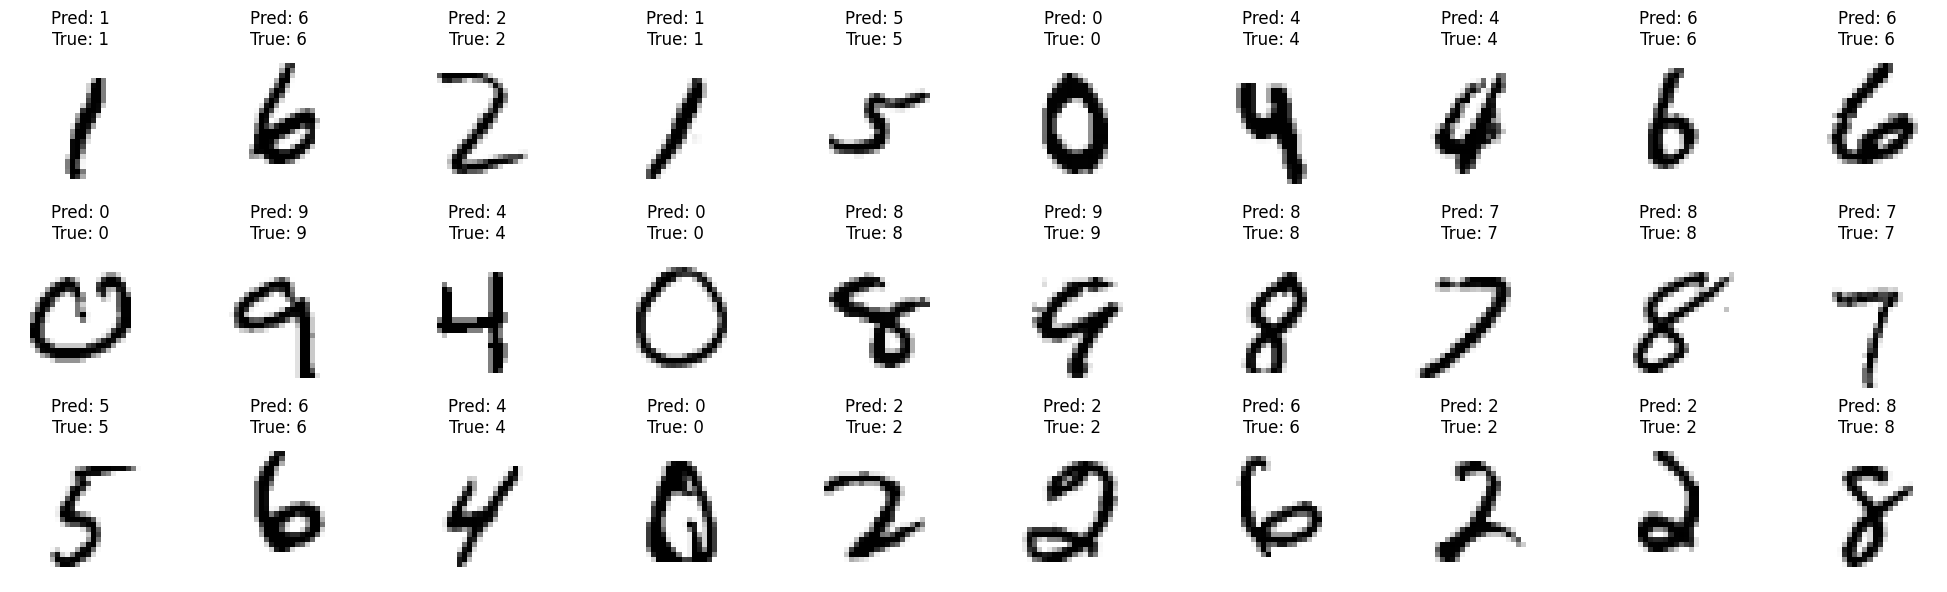

In [9]:
# Visualize random predictions from the test set
num_rows, num_cols = 3, 10
plt.figure(figsize=(20, 6))
for idx in range(num_rows * num_cols):
    sample_idx = random.randint(0, test_images.shape[0] - 1)
    sample_img = test_images[sample_idx].reshape(28, 28)
    predicted_label = np.argmax(cnn_model.predict(test_images[sample_idx:sample_idx + 1], verbose=0))
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.imshow(sample_img, cmap='gray_r')
    plt.title(f"Pred: {predicted_label}\nTrue: {test_labels[sample_idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()